### 한국인의 삶을 파악하라(3) - 직업별 월급의 관계
* 어떤 직업이 월급을 가장 많이 받을까?

### 학습내용
* read_excel-sheet 이해하기
* left_join() 이해하기
* select() 이해하기 
* filter( 조건 & 조건)
* arrange(desc() ) 이해하기

In [17]:
library(foreign)
library(dplyr)
library(ggplot2)
library(readxl)

In [22]:
dat_welfare <- read.spss(file="D:\\dataset\\R_Doit\\Koweps_hpc10_2015_beta1.sav", to.data.frame=T)
welfare <- dat_welfare

Warning message in read.spss(file = "D:\\dataset\\R_Doit\\Koweps_hpc10_2015_beta1.sav", :
"D:\dataset\R_Doit\Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [23]:
welfare <- rename(welfare, 
                 sex=h10_g3,
                 birth=h10_g4,
                 marriage=h10_g10,
                 religion=h10_g11,
                 income=p1002_8aq1,
                 code_job=h10_eco9,
                 code_region=h10_reg7)


In [34]:
welfare <- select(welfare, sex, birth, marriage, religion, income, code_job, code_region)
names(welfare)

[1] "sex"         "birth"       "marriage"    "religion"    "income"     
[6] "code_job"    "code_region"

### P3-1 변수 확인 및 전처리

### 직업 : code_job, 월급 : income
### 파일 읽어오기

In [35]:
listjob <- read_excel("R_Doit/Koweps_Codebook.xlsx", sheet=2)
head(listjob,20)

code_job,job
111,의회의원 고위공무원 및 공공단체임원
112,기업고위임원
120,행정 및 경영지원 관리자
131,연구 교육 및 법률 관련 관리자
132,보험 및 금융 관리자
133,보건 및 사회복지 관련 관리자
134,문화 예술 디자인 및 영상 관련 관리자
135,정보통신관련 관리자
139,기타 전문서비스 관리자
141,건설 전기 및 생산 관련 관리자


In [36]:
dim(listjob)

[1] 149   2

* 목록 코드와 직업
* 직업이 149개로 분류

### left_join()를 이용한 데이터 결합

In [37]:
table(welfare$code_job)


 111  120  131  132  133  134  135  139  141  149  151  152  153  159  211  212 
   2   16   10   11    9    3    7   10   35   20   26   18   15   16    8    4 
 213  221  222  223  224  231  232  233  234  235  236  237  239  241  242  243 
   3   17   31   12    4   41    5    3    6   48   14    2   29   12    4   63 
 244  245  246  247  248  251  252  253  254  259  261  271  272  273  274  281 
   4   33   59   77   38   14  111   24   67  109    4   15   11    4   36   17 
 283  284  285  286  289  311  312  313  314  320  330  391  392  399  411  412 
   8   10   26   16    5  140  260  220   84   75   15    4   13   87   47   12 
 421  422  423  429  431  432  441  442  510  521  522  530  611  612  613  620 
 124   71    5   14   20   33  154  197  192  353    5  106 1320   11   40    2 
 630  710  721  722  730  741  742  743  751  752  753  761  762  771  772  773 
  20   29   30   22   16   27    3   34   34    5   49   69   27   11   61   86 
 774  780  791  792  799  8

In [38]:
length(table(welfare$code_job))
names(welfare)

[1] 145

[1] "sex"         "birth"       "marriage"    "religion"    "income"     
[6] "code_job"    "code_region"

In [39]:
names(welfare)
welfare <- left_join(welfare, listjob, id="code_job")
names(welfare)

[1] "sex"         "birth"       "marriage"    "religion"    "income"     
[6] "code_job"    "code_region"

Joining, by = "code_job"


[1] "sex"         "birth"       "marriage"    "religion"    "income"     
[6] "code_job"    "code_region" "job"

In [43]:
# 데이터 확인 - NA의 제거는 filter를 이용하면 된다.
welfare %>% select(code_job, job, income)

code_job,job,income
NA,NA,NA
NA,NA,NA
942,경비원 및 검표원,120
762,전기공,200
NA,NA,NA
530,방문 노점 및 통신 판매 관련 종사자,NA
NA,NA,NA
NA,NA,NA
NA,NA,NA
NA,NA,NA


In [47]:
job_income <- welfare %>%
              filter(!is.na(job) & !is.na(income)) %>%
              group_by(job) %>%
              summarise(mean_income = mean(income))
head(job_income)

job,mean_income
가사 및 육아 도우미,80.16648
간호사,240.68127
건설 및 광업 단순 종사원,190.12974
건설 및 채굴 기계운전원,357.97000
건설 전기 및 생산 관련 관리자,535.80556
건설관련 기능 종사자,246.63214


In [48]:
welfare %>% filter(job=='스포츠 및 레크레이션 관련 전문가')

sex,birth,marriage,religion,income,code_job,code_region,job
1,1975,5,1,NA,286,1,스포츠 및 레크레이션 관련 전문가
2,1986,5,2,150.0,286,1,스포츠 및 레크레이션 관련 전문가
1,1983,1,2,NA,286,3,스포츠 및 레크레이션 관련 전문가
2,1985,1,1,NA,286,3,스포츠 및 레크레이션 관련 전문가
1,1969,1,2,NA,286,2,스포츠 및 레크레이션 관련 전문가
1,1992,5,1,222.0,286,5,스포츠 및 레크레이션 관련 전문가
2,1995,5,2,136.4,286,5,스포츠 및 레크레이션 관련 전문가
2,1994,5,2,150.0,286,2,스포츠 및 레크레이션 관련 전문가
2,1965,1,2,NA,286,4,스포츠 및 레크레이션 관련 전문가
2,1975,1,1,NA,286,4,스포츠 및 레크레이션 관련 전문가


In [45]:
job_income %>% filter(job=='스포츠 및 레크레이션 관련 전문가')

job,mean_income
스포츠 및 레크레이션 관련 전문가,196.5667


In [50]:
top20 <- job_income %>% 
          arrange(desc(mean_income)) %>%
           head(20)
top20

job,mean_income
금속 재료 공학 기술자 및 시험원,845.0667
의료진료 전문가,843.6429
의회의원 고위공무원 및 공공단체임원,750.0000
보험 및 금융 관리자,726.1800
제관원 및 판금원,572.4067
행정 및 경영지원 관리자,563.7633
문화 예술 디자인 및 영상 관련 관리자,557.4667
연구 교육 및 법률 관련 관리자,549.9125
건설 전기 및 생산 관련 관리자,535.8056
석유 및 화학물 가공장치 조작원,531.6600


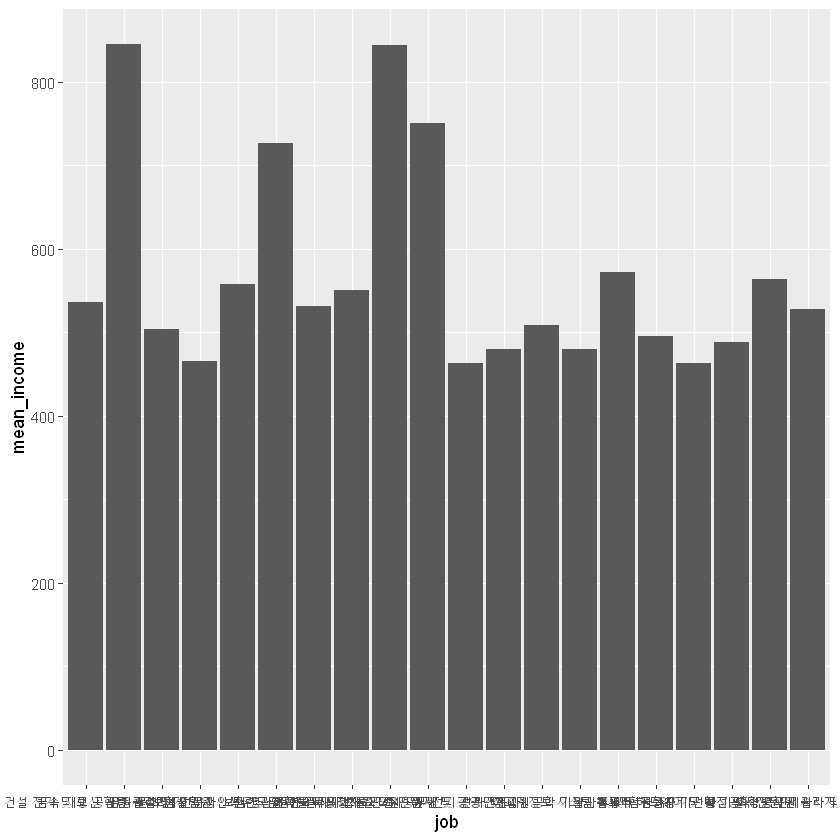

In [51]:
ggplot(top20, aes(x=job, y=mean_income)) + geom_col()

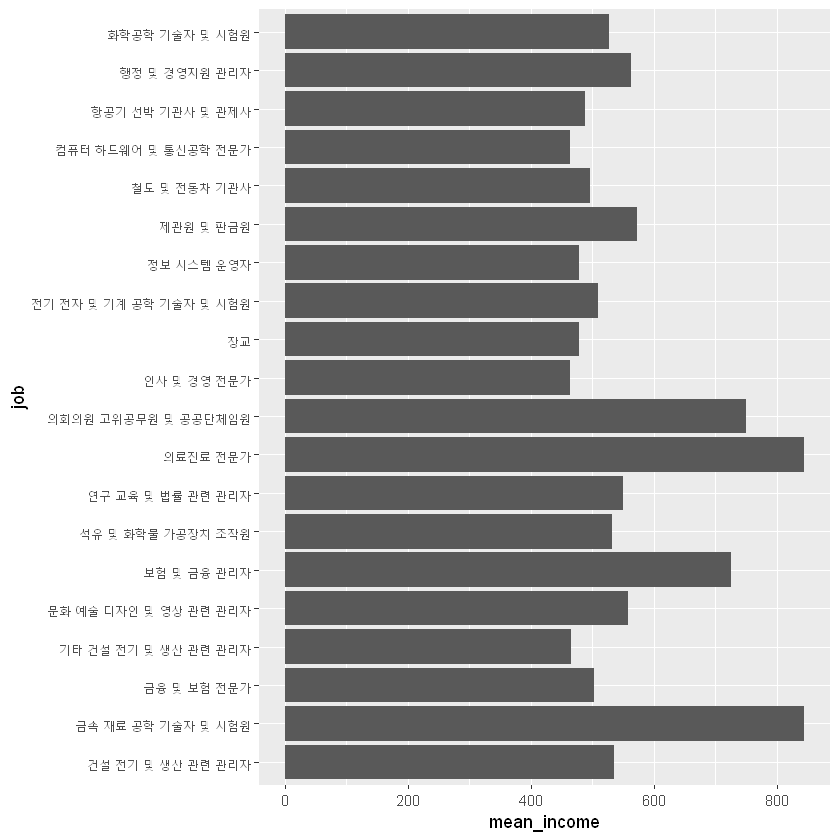

In [52]:
ggplot(top20, aes(x=job, y=mean_income)) + geom_col() + coord_flip()

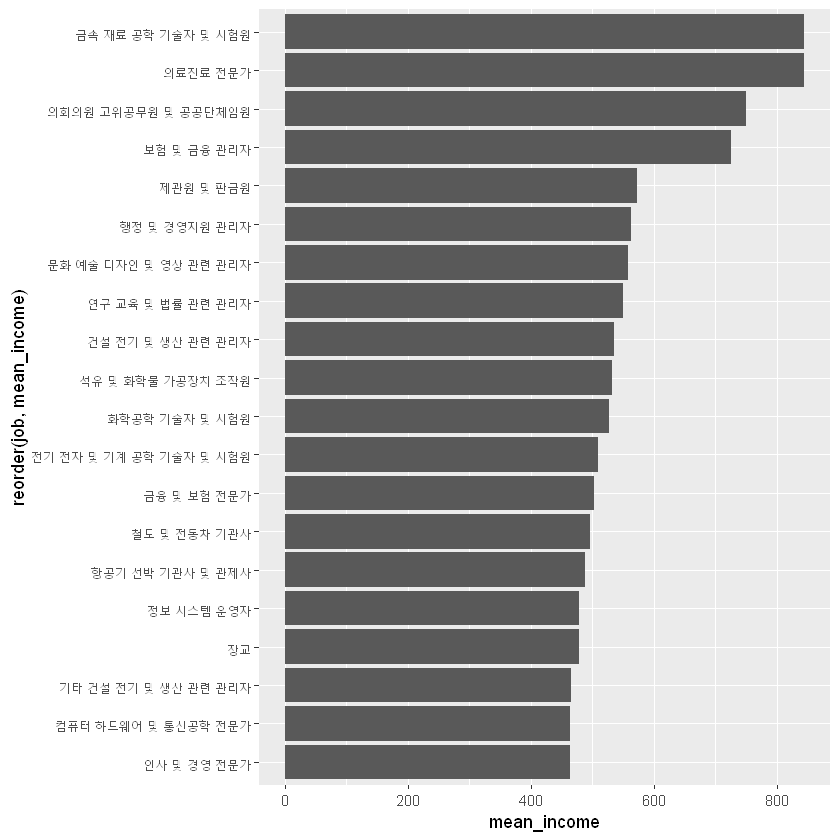

In [53]:
ggplot(top20, aes(x=reorder(job, mean_income), y=mean_income)) + geom_col() + coord_flip()

### (실습해보기) P3-1
* (가) 직업별 수입 하위 20위를 추출해보자
* (나) 직업별 수입 그래프를 출력해 보자.
* (다) 직업별 수입 해석 결과를 적어보자.


### (실습해보기) P3-2
* (가) '성별로 어떤 직업이 많은지'에 대해 분석해보자.
* (Hint) summarise(n=n()) 은 해당 그룹에 대한 개수를 출력할 수 있다.